# CNN

## problem definition
predict a type of clothing item

### pre-requisites

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### import required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### load the data

In [5]:
from tensorflow.keras.datasets import fashion_mnisto

# load the fashion mnist data from tensorflow
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [18]:
# create a labels array
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
def render_train_image(index):
    plt.figure(figsize=(2, 2))
    plt.imshow(train_images[index])
    class_name = class_names[train_labels[index]]
    plt.title(class_name)

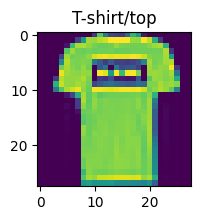

In [29]:
render_train_image(1)

### pre-processing

In [33]:
# normalizing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

### traing the model

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# create a model
model = Sequential()

# add CNN flatten layer
model.add(Flatten(input_shape=[28, 28]))

# add the ANN hidden layer
model.add(Dense(units=128, activation="relu"))

# add the output layer
# since this is a multi-label classification, no of neurons needed in output layer = 10
model.add(Dense(units=10, activation="softmax"))

# initialize the model
optimizer = tf.optimizers.Adam()
loss_function = tf.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_function, optimizer=optimizer, metrics=["accuracy"])

In [40]:
# build the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 773us/step - loss: 0.5001 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.3747 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.3371 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.3122 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.2954 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.2803 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.2694 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 1s 783us/step - loss: 0.2575 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.2480 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 1s 773u

### model prediction

In [42]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 294us/step


predicted class = 7, observed class = 5


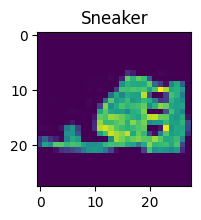

In [65]:
def predict_test_image(index):
    prediction_at_index = predictions[index]
    max_probability = np.max(prediction_at_index)
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[index])
    final_class = 0
    for tmp_index in range(len(class_names)):
        if prediction_at_index[tmp_index] == max_probability:
            final_class = tmp_index
            break
    class_name = class_names[final_class]
    print(f"predicted class = {final_class}, observed class = {test_labels[index]}")
    plt.title(class_name)

predict_test_image(902)